In [1]:
import pandas as pd
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential

In [8]:
df = pd.read_csv("./data/fashion/fashion-mnist_train.zip")

In [3]:
X = df.iloc[:, 1:].values

In [4]:
X.shape

(60000, 784)

In [5]:
X = X/255. # Rescale

In [6]:
autoencoder = Sequential([
    # Encoder
    Input(shape=(784,)),
    Dense(256, activation='sigmoid'),
    #Dense(128, activation='sigmoid'), 
    
    # Latent space
    Dense(64, activation='sigmoid'), 
    
    # Decoder
   # Dense(128, activation='sigmoid'), 
    Dense(256, activation='sigmoid'), 
    Dense(784, activation='sigmoid')
])


In [7]:
autoencoder.compile(loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
autoencoder.fit(X,X)

Train on 60000 samples
60000/60000 [==============================] - 68s 1ms/sample - loss: 0.3945 - accuracy: 0.4926


### Load in some test data

In [10]:
test = pd.read_csv("./data/fashion/fashion-mnist_test.csv")

In [13]:
x = test.iloc[0,1:].values

In [14]:
x_prime = autoencoder.predict(x.reshape(1,784))

In [16]:
import matplotlib.pyplot as plt

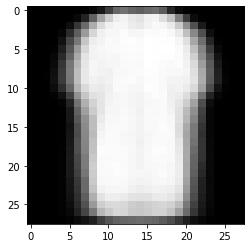

In [18]:
plt.imshow(x_prime.reshape(28,28), cmap='gray')

In [19]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               201488    
Total params: 484,944
Trainable params: 484,944
Non-trainable params: 0
__________________________________________________

In [20]:
autoencoder.layers

In [29]:
encoder =  Sequential(autoencoder.layers[:3])

In [31]:
latent_x = encoder.predict(x.reshape(1,784))

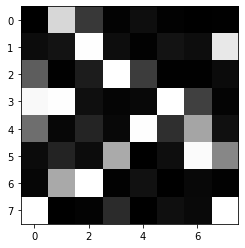

In [34]:
plt.imshow(latent_x.reshape(8,8), cmap='gray')